### Assignment 4 - Linear Regression

### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

### 1) Delivery_time -> Predict delivery time using sorting time 


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as cp 

In [2]:
delvtime = pd.read_csv('delivery_time.csv')

In [3]:
delvtime

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
Delivery = delvtime['Delivery Time']
Sorting = delvtime['Sorting Time']

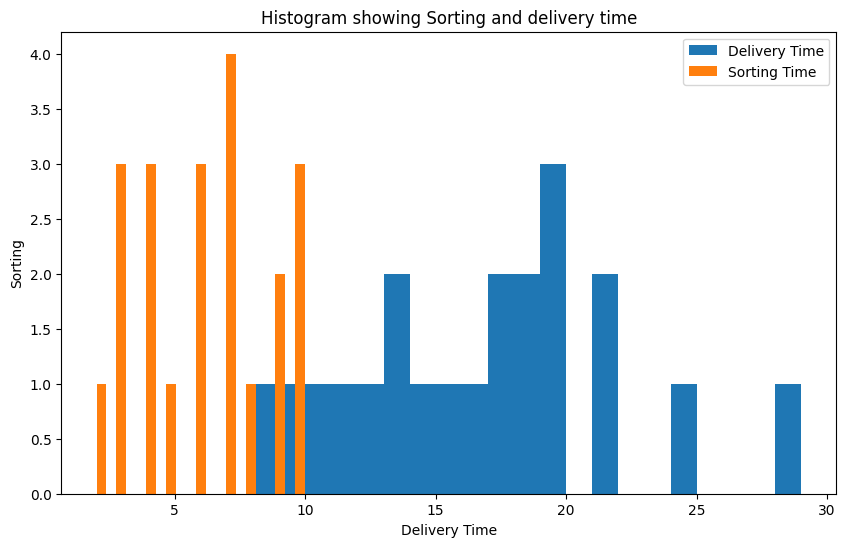

In [5]:
# histogram
plt.figure(figsize=(10, 6))
plt.hist(Delivery, bins=21, label='Delivery Time')
plt.hist(Sorting, bins=21, label='Sorting Time')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting')
plt.title('Histogram showing Sorting and delivery time')
plt.legend()
plt.show()

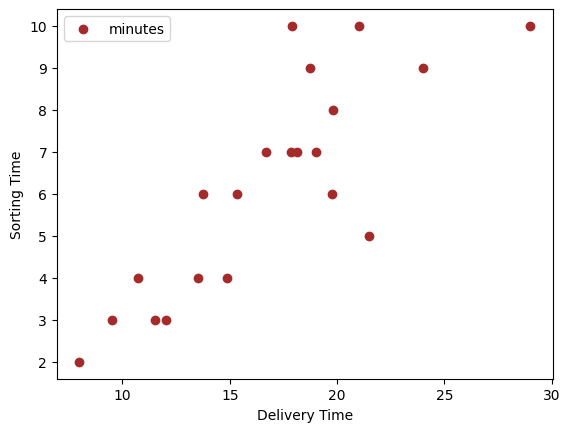

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(delvtime['Delivery Time'].values.reshape(-1, 1), delvtime['Sorting Time'])

plt.scatter(delvtime['Delivery Time'], delvtime['Sorting Time'], color='brown', label = 'minutes')

plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.legend()


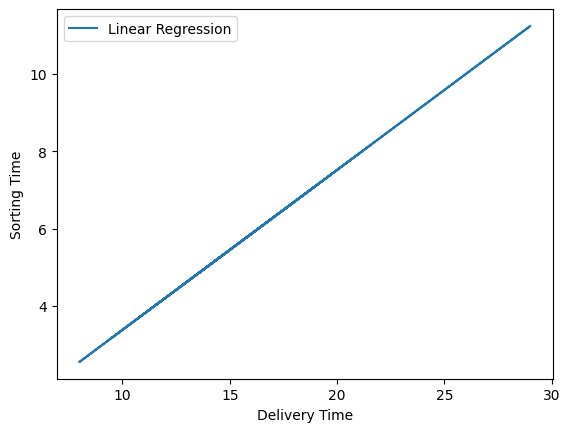

In [7]:
plt.plot(delvtime['Delivery Time'], lm.predict(delvtime['Delivery Time'].values.reshape(-1, 1)),label='Linear Regression')

plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.legend()


In [8]:
delvtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [9]:
delvtime.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
delvtime.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [11]:
delvtime.shape

(21, 2)

In [12]:
x = delvtime[['Sorting Time']]
y = delvtime[['Delivery Time']]

In [13]:
x

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [14]:
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) # 20-30

In [16]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(16, 1)
(5, 1)

(16, 1)
(5, 1)


In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [18]:
lm.fit(x_train,y_train) 

LinearRegression()

In [19]:
print(lm.coef_)

[[1.84026494]]


In [20]:
print(lm.intercept_)

[5.99786815]


<Axes: >

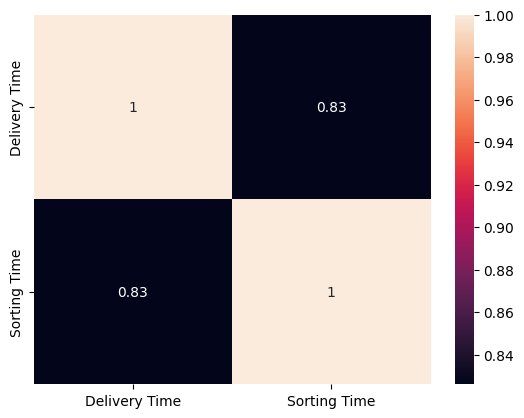

In [21]:
sns.heatmap(delvtime.corr(),annot=True)

In [22]:
y_pred = lm.predict(x_test)

In [23]:
y_pred

array([[24.40051756],
       [22.56025262],
       [17.03945779],
       [18.87972274],
       [18.87972274]])

In [27]:
new_delvtime = pd.DataFrame()
new_delvtime = x_test
new_delvtime['Actual Delivery Time']= y_test
new_delvtime['Predicted Delivery Time']= y_pred
new_delvtime


,Sorting Time,Actual Delivery Time,Predicted Delivery Time
0,10,21.00,24.400518
9,9,18.75,22.560253
16,6,13.75,17.039458
12,7,16.68,18.879723
6,7,19.00,18.879723


In [28]:
new_delvtime.shape

(5, 3)

In [29]:
lm.score(x_train,y_train)*100

71.91358112770911

----------------------------------------------------------------------------------------

### 2) Salary_hike -> Build a prediction model for Salary_hike


In [75]:
salexp_data = pd.read_csv('Salary_Data.csv')

In [76]:
salexp_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [77]:
YearsExperience = salexp_data['YearsExperience']
Salary = salexp_data['Salary']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


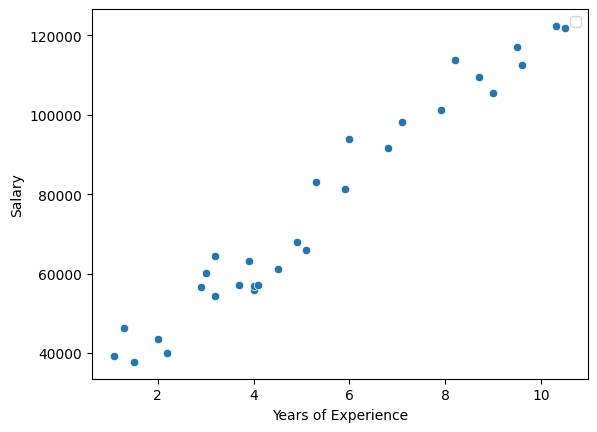

In [82]:

sns.scatterplot(x='YearsExperience', y='Salary',data=salexp_data)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()


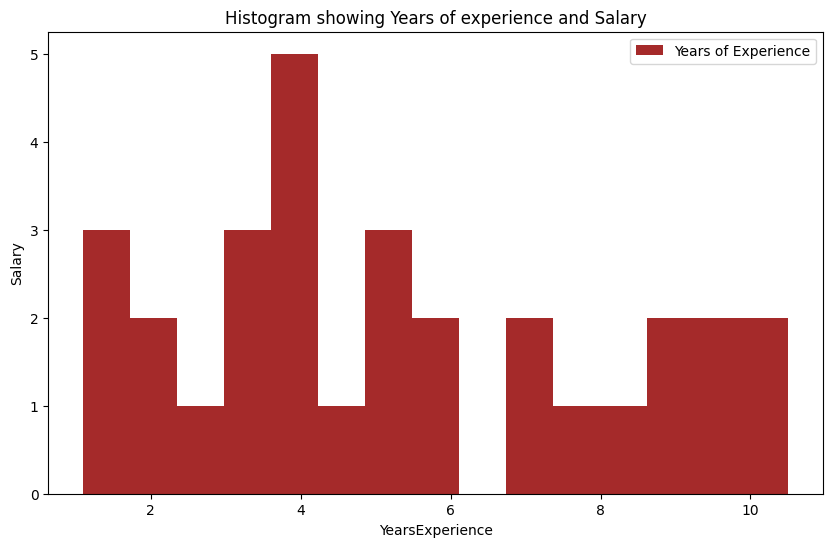

In [84]:
plt.figure(figsize=(10, 6))
plt.hist(YearsExperience, bins=15, label='Years of Experience', color='brown')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Histogram showing Years of experience and Salary')
plt.legend()
plt.show()

<Axes: >

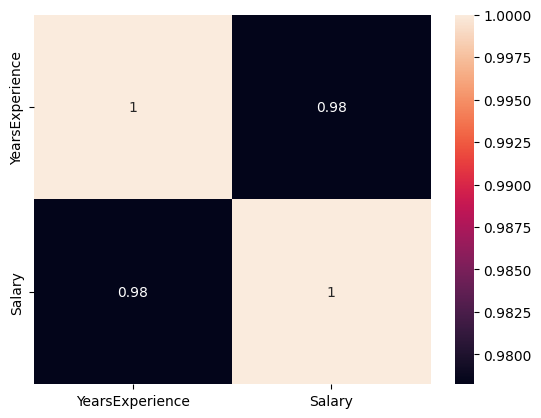

In [85]:
sns.heatmap(salexp_data.corr(),annot=True)

In [86]:
x = salexp_data[['YearsExperience']]
y = salexp_data[['Salary']]

In [87]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [88]:
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [89]:
salexp_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [90]:
salexp_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [92]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)

(24, 1)
(6, 1)


In [93]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

In [94]:
lm.fit(x_train,y_train)

LinearRegression()

In [95]:
print(lm.coef_)

[[9338.56728615]]


In [96]:
print(lm.intercept_)

[26889.12311077]


In [97]:
y_pred = lm.predict(x_test)
y_pred

array([[ 74515.81627015],
       [ 68912.67589846],
       [123076.36615815],
       [ 40896.97404   ],
       [ 63309.53552677],
       [ 93192.95084246]])

In [98]:
new_salexp = pd.DataFrame()
new_salexp = x_test
new_salexp['Actual Salary']=y_test
new_salexp['Predicted Salary']=y_pred 
new_salexp

,YearsExperience,Actual Salary,Predicted Salary
16,5.1,66029.0,74515.816270
14,4.5,61111.0,68912.675898
28,10.3,122391.0,123076.366158
2,1.5,37731.0,40896.974040
10,3.9,63218.0,63309.535527
21,7.1,98273.0,93192.950842


In [99]:
new_salexp.shape

(6, 3)

In [101]:
lm.score(x_train, y_train)*100

95.46697062207208